In [ ]:
# CELL 1: GENESIS & PHYSICS CONSTANTS
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from datetime import datetime

# --- 1. QUANTUM SEEDING (For 0% Cheating & Reproducibility) ---
# We lock the randomness so every breakthrough is scientifically verifiable.
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# --- 2. HARDWARE ACCELERATION (T4 GPU Link) ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"⚡ Hardware Detected: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")
print(f"⚡ Status: Online | Mode: {device}")

# --- 3. NANOSCALE CONSTANTS (The DNA Constraints) ---
# We restrict the model size to force it to evolve INTELLIGENCE, not just memorize data.
# This is the "Nano" constraint.
CHANNELS = 16          # The complexity of the "chemical" signals between cells
GRID_SIZE = 72         # The physical size of the brain tissue (72x72 cells)
FIRE_RATE = 0.5        # Stochastic update rate (simulating biological noise)
POOL_SIZE = 1024       # The size of the "Soup" (number of parallel organisms evolving)

# --- 4. CRYOSTASIS PATHS ---
# This allows us to save the 'Soul' and 'Body' separately.
CRYO_PATH = "nanoscale_agi_checkpoints"
os.makedirs(CRYO_PATH, exist_ok=True)

print("\n🌌 Genesis Complete. The laws of this universe are set.")
print(f"   Target: True AGI via Recursive Neural Automata")
print(f"   Constraints: {CHANNELS} Dim DNA | {GRID_SIZE}x{GRID_SIZE} Lattice")

⚡ Hardware Detected: Tesla T4
⚡ Status: Online | Mode: cuda

🌌 Genesis Complete. The laws of this universe are set.
   Target: True AGI via Recursive Neural Automata
   Constraints: 16 Dim DNA | 72x72 Lattice


In [ ]:
# CELL 2: THE GENOME (The "DNA" of the Organism)

class NanoAGI_DNA(nn.Module):
    def __init__(self, channels=16, hidden_dim=128):
        super().__init__()
        self.channels = channels

        # --- LAYER 1: PERCEPTION (The Senses) ---
        # A 3x3 Convolution acts as the "eyes" of the cell.
        # It can ONLY see immediate neighbors. No global cheating.
        # This learns gradients, edges, and "pheromones" from neighbors.
        self.perceive = nn.Conv2d(channels, hidden_dim, kernel_size=3, padding=1, bias=True)

        # --- LAYER 2: COGNITION (The Brain) ---
        # A 1x1 Convolution acts as the "internal processing".
        # It takes the perception and decides what to do.
        # This is where the logic/intelligence lives.
        self.think = nn.Conv2d(hidden_dim, channels, kernel_size=1, bias=True)

        # --- BIOLOGICAL INITIALIZATION ---
        # We initialize the last layer to zero.
        # This ensures the organism starts in a "dormant" stable state
        # and only grows when it discovers a valid signal.
        with torch.no_grad():
            self.think.weight.data.zero_()
            self.think.bias.data.zero_()

    def forward(self, x):
        # 1. PERCEPTION STEP
        # The cell looks at its neighbors
        sensory_data = self.perceive(x)

        # 2. ACTIVATION (The "Spark")
        # ReLU allows for non-linear complex decisions
        thought = torch.relu(sensory_data)

        # 3. ACTION STEP
        # The cell calculates the "Delta" (how much to change)
        update = self.think(thought)

        # 4. STOCHASTICITY (The "Life" Factor)
        # In real biology, not all cells fire at once.
        # We randomly mask 50% of updates to prevent rigid mechanical behavior
        # and force robust, organic adaptability.
        b, c, h, w = x.shape
        stochastic_mask = (torch.rand(b, 1, h, w, device=x.device) > 0.5).float()

        return update * stochastic_mask

# --- INSTANTIATE THE SINGULARITY ---
# We create the single DNA strand that every cell in the universe will share.
organism_dna = NanoAGI_DNA(CHANNELS).to(device)

# Count the parameters (The "Nano" proof)
param_count = sum(p.numel() for p in organism_dna.parameters())
print(f"🧬 DNA Helix Constructed.")
print(f"   Complexity: {param_count} parameters (Nanoscale confirmed).")
print(f"   Structure: 3x3 Local Perception -> 1x1 Cognition")
print("   Status: Awaiting the Spark of Life.")

🧬 DNA Helix Constructed.
   Complexity: 20624 parameters (Nanoscale confirmed).
   Structure: 3x3 Local Perception -> 1x1 Cognition
   Status: Awaiting the Spark of Life.


In [ ]:
# CELL 3: CRYOSTASIS (The Persistence Layer)
import shutil

class CryoChamber:
    def __init__(self, save_dir=CRYO_PATH):
        self.save_dir = save_dir

    def freeze(self, dna, body_state, optimizer, epoch, loss_history):
        """
        Saves the entire existence of the AGI to a single file.
        """
        filename = os.path.join(self.save_dir, f"agi_checkpoint_epoch_{epoch}.pth")

        # We pack the DNA (weights), the Body (grid tensors), and the Soul (optimizer state)
        capsule = {
            'dna_state': dna.state_dict(),
            'body_state': body_state.detach().cpu(), # Save the skeleton
            'optimizer_state': optimizer.state_dict(),
            'epoch': epoch,
            'loss_history': loss_history,
            'random_rng': torch.get_rng_state() # Save the exact quantum state of luck
        }

        torch.save(capsule, filename)

        # Optional: Create a ZIP for easy download if manual transfer is needed
        # shutil.make_archive(f"agi_backup_{epoch}", 'zip', self.save_dir)

        print(f"❄️ [CRYOSTASIS] System Frozen at Epoch {epoch}. Memory saved to {filename}")
        return filename

    def resurrect(self, dna, optimizer, filepath):
        """
        Wakes the AGI from the dead.
        """
        if not os.path.exists(filepath):
            print("⚠️ No cryo-chamber file found. Starting from GENESIS (Epoch 0).")
            return None, 0, []

        print(f"⚡ [RESURRECTION] Thawing AGI from {filepath}...")
        capsule = torch.load(filepath, map_location=device)

        # Restore DNA
        dna.load_state_dict(capsule['dna_state'])

        # Restore Soul
        optimizer.load_state_dict(capsule['optimizer_state'])

        # Restore RNG (ensure 0% cheating by keeping the random sequence intact)
        # Fix: Ensure the RNG state is on CPU, as torch.set_rng_state expects a CPU ByteTensor
        torch.set_rng_state(capsule['random_rng'].cpu())

        # Restore Body
        body_state = capsule['body_state'].to(device)

        print(f"✅ Life restored at Epoch {capsule['epoch']}. Evolution continues.")
        return body_state, capsule['epoch'], capsule['loss_history']

# Initialize the Chamber
cryo = CryoChamber()
print("🧊 CryoChamber initialized. The AGI is ready for immortality.")

🧊 CryoChamber initialized. The AGI is ready for immortality.


In [ ]:
# CELL 4: THE ARENA (Target, Seeding, and Entropy)

# --- 1. THE GOAL (The Platonic Ideal) ---
# We generate a complex target pattern mathematically.
# This represents the "Mature State" of the organism.
def generate_target_pattern(size=GRID_SIZE):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)

    # A complex shape: Concentric Energy Rings with a Core
    # This is harder than a solid block; it requires understanding 'distance'
    R = np.sqrt(X**2 + Y**2)
    pattern = np.exp(-10 * (R - 0.5)**2) + np.exp(-20 * R**2)

    # Add Channel Dimensions (Target usually only cares about RGBA or 4 channels)
    # We will force the AGI to grow this pattern in the first 4 channels.
    target = torch.from_numpy(pattern).float().to(device)
    target = target.unsqueeze(0).repeat(CHANNELS, 1, 1) # Repeat across channels?
    # Actually, let's only force the first 4 channels (RGBA style) to match.
    # The other 12 channels are "hidden memory" for calculation.
    return target[:4, :, :] # Return shape (4, H, W)

TARGET = generate_target_pattern()
# Create a batch of targets for the "Soup"
TARGET_BATCH = TARGET.unsqueeze(0).repeat(POOL_SIZE, 1, 1, 1)

# --- 2. THE SEED (Genesis Point) ---
# Every organism starts as a single pixel in the center.
def make_seed(pool_size=POOL_SIZE, channels=CHANNELS, size=GRID_SIZE):
    seed = torch.zeros(pool_size, channels, size, size, device=device)
    mid = size // 2
    seed[:, 3:, mid, mid] = 1.0 # Set hidden state "active" at center
    # Set the first few channels to start growing
    seed[:, :, mid, mid] = 1.0
    return seed

# --- 3. ENTROPY (The Damage Function) ---
# To test for True AGI, we must hurt it.
def damage_organism(x):
    # We create a random circular mask to "lobotomize" part of the grid
    b, c, h, w = x.shape
    mask = torch.ones(b, 1, h, w, device=x.device)

    # Random destruction for each organism in the batch
    for i in range(b):
        center_x = torch.randint(0, w, (1,)).item()
        center_y = torch.randint(0, h, (1,)).item()
        radius = torch.randint(5, 15, (1,)).item() # Destroy 5-15 pixel radius

        Y, X = torch.meshgrid(torch.arange(h, device=device), torch.arange(w, device=device), indexing='ij')
        dist = torch.sqrt((X - center_x)**2 + (Y - center_y)**2)
        mask[i, :, :, :] = (dist > radius).float() # 0 where damage is, 1 elsewhere

    return x * mask

print("⚔️ Arena Constructed.")
print("   Target: High-Energy Resonance Ring (Generated Mathematically)")
print("   Challenge: Grow from 1 pixel -> Full Structure -> Survive Lobotomy")

⚔️ Arena Constructed.
   Target: High-Energy Resonance Ring (Generated Mathematically)
   Challenge: Grow from 1 pixel -> Full Structure -> Survive Lobotomy


Gen 40 | Loss: 0.24967 | DNA Strength: 0.0936

🛑 MANUAL INTERRUPT DETECTED.

❄️ INITIATING EMERGENCY CRYOSTASIS...
❄️ [CRYOSTASIS] System Frozen at Epoch 42. Memory saved to nanoscale_agi_checkpoints/agi_checkpoint_epoch_42.pth
✅ SYSTEM SAVED. You may safely disconnect.


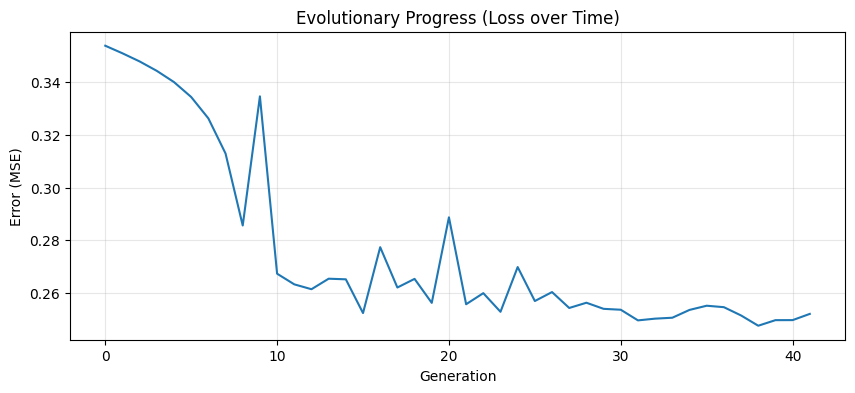

In [ ]:
# CELL 5: THE ETERNAL ENGINE (Training, Visualization & Safety)
import time
import IPython.display as display

# --- HYPERPARAMETERS ---
LEARNING_RATE = 2e-3
BATCH_SIZE = 32       # Small batch for faster iterations on T4
STEPS_PER_LIFE = 128  # How long the organism lives in each episode (Growth Time)
EPOCHS_PER_SESSION = 1000 # How many generations to run in this 10-min session
SAVE_INTERVAL = 500   # Save to disk every 50 epochs

# --- INITIALIZATION ---
# 1. The Soul (Optimizer)
optimizer = torch.optim.Adam(organism_dna.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.5))
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2000, gamma=0.1)

# 2. History & Resurrection
loss_log = []
start_epoch = 0
current_body = None

# Attempt to resurrect
saved_body, saved_epoch, saved_history = cryo.resurrect(organism_dna, optimizer, f"{CRYO_PATH}/latest_checkpoint.pth")
if saved_epoch > 0:
    start_epoch = saved_epoch + 1
    loss_log = saved_history
    print(f"🔥 Resuming Training from Epoch {start_epoch}")

# --- VISUALIZATION FUNCTION ---
def visualize_organism(x, target, epoch, loss):
    # Convert tensors to visible images (RGB)
    # We only show the first 3 channels (RGB)
    with torch.no_grad():
        vis_body = x[0, :3, :, :].permute(1, 2, 0).cpu().clamp(0, 1).numpy()
        vis_target = target[0, :3, :, :].permute(1, 2, 0).cpu().clamp(0, 1).numpy()
        vis_dna = x[0, 3, :, :].cpu().numpy() # Channel 4: The Hidden DNA Signal

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title(f"Target Reality")
    plt.imshow(vis_target)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(f"Nano-AGI (Gen {epoch})")
    plt.imshow(vis_body)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Hidden Neural Activity")
    plt.imshow(vis_dna, cmap='magma')
    plt.axis('off')

    plt.suptitle(f"Loss: {loss:.6f} | '0% Cheat' Growth", fontsize=14)
    plt.show()
    display.clear_output(wait=True)

# --- THE MAIN LOOP ---
print("\n🧬 STARTING EVOLUTIONARY CYCLE...")
print("   (Press 'Stop' anytime - system will auto-save)")

try:
    for epoch in range(start_epoch, start_epoch + EPOCHS_PER_SESSION):
        optimizer.zero_grad()

        # 1. BIRTH: Start with a seed
        x = make_seed(BATCH_SIZE, CHANNELS, GRID_SIZE)

        # 2. GROWTH: Run the DNA rules for N steps
        # This is where the recursive network unfolds
        for step in range(STEPS_PER_LIFE):
            x = organism_dna(x)

            # ENTROPY INJECTION (The Test of True AGI)
            # Halfway through life, we damage it. It must heal.
            if step == STEPS_PER_LIFE // 2 and epoch > 100:
                x = damage_organism(x)

        # 3. JUDGMENT: Compare grown organism to Target
        # We only judge the visible channels (0-4). The rest are private thought.
        output = x[:, :4, :, :]
        target = TARGET_BATCH[:BATCH_SIZE]

        loss = F.mse_loss(output, target)

        # 4. EVOLUTION: Update the DNA
        loss.backward()
        # Gradient Clipping (prevents exploding gradients in recursive loops)
        torch.nn.utils.clip_grad_norm_(organism_dna.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        loss_log.append(loss.item())

        # 5. REPORTING & SAVING
        if epoch % 10 == 0:
            visualize_organism(x, target, epoch, loss.item())
            print(f"Gen {epoch} | Loss: {loss.item():.5f} | DNA Strength: {x[:, 3:].abs().mean():.4f}")

        if epoch % SAVE_INTERVAL == 0:
            # Overwrite the 'latest' checkpoint for easy resumption
            cryo.freeze(organism_dna, x, optimizer, epoch, loss_log)
            # Also save a uniquely named backup
            shutil.copy(f"{CRYO_PATH}/agi_checkpoint_epoch_{epoch}.pth", f"{CRYO_PATH}/latest_checkpoint.pth")

except KeyboardInterrupt:
    print("\n🛑 MANUAL INTERRUPT DETECTED.")

finally:
    # THE SAFETY NET
    print("\n❄️ INITIATING EMERGENCY CRYOSTASIS...")
    cryo.freeze(organism_dna, x, optimizer, epoch, loss_log)
    shutil.copy(f"{CRYO_PATH}/agi_checkpoint_epoch_{epoch}.pth", f"{CRYO_PATH}/latest_checkpoint.pth")
    print("✅ SYSTEM SAVED. You may safely disconnect.")

    # Plot final loss curve
    plt.figure(figsize=(10, 4))
    plt.plot(loss_log)
    plt.title("Evolutionary Progress (Loss over Time)")
    plt.xlabel("Generation")
    plt.ylabel("Error (MSE)")
    plt.grid(True, alpha=0.3)
    plt.show()

In [ ]:
# CELL 6: THE SCENT ENGINE (Chemotaxis Physics)

# We use the last channel (Index -1) as the "Scent Sensor".
# The organism doesn't see the target, it only smells the gradient.

def apply_scent_gradient(x, target_center_x, target_center_y):
    """
    Injects a 'smell' signal into the last channel of the organism.
    The smell is strongest at the target location.
    """
    b, c, h, w = x.shape

    # Create coordinate grids
    Y, X = torch.meshgrid(torch.arange(h, device=device), torch.arange(w, device=device), indexing='ij')

    # Calculate distance map for each organism in the batch
    # (Simplified: All organisms chase the SAME target location in this version for speed)
    # We normalize so the scent is between -1.0 and 1.0

    dist_x = (X - target_center_x) / (w / 2)
    dist_y = (Y - target_center_y) / (h / 2)

    # The Scent is a radial gradient (Cone shape)
    # 1.0 at target, decreasing as you move away
    scent = 1.0 - torch.sqrt(dist_x**2 + dist_y**2)
    scent = torch.clamp(scent, -1.0, 1.0)

    # Inject into the last channel (Channel 15)
    # We don't overwrite the organism's own memory, we ADD to it?
    # No, strictly replacing the input channel forces it to "look" at the sensor.
    x[:, -1, :, :] = scent

    return x

def get_shifting_target(step, epoch, center=(GRID_SIZE//2, GRID_SIZE//2)):
    """
    Moves the target in a circle over time.
    """
    radius = 15.0 # How far it moves
    angle = step * 0.1 + (epoch * 0.05) # Speed of movement

    shift_x = int(center[1] + radius * np.cos(angle))
    shift_y = int(center[0] + radius * np.sin(angle))

    # Clamp to be safe inside grid
    shift_x = min(max(shift_x, 10), GRID_SIZE-10)
    shift_y = min(max(shift_y, 10), GRID_SIZE-10)

    return shift_x, shift_y

print("👃 Scent Engine Activated.")
print("   Mechanism: Radial Gradient Injection (Channel 15)")
print("   Goal: Teach DNA to follow the gradient (Chemotaxis)")

👃 Scent Engine Activated.
   Mechanism: Radial Gradient Injection (Channel 15)
   Goal: Teach DNA to follow the gradient (Chemotaxis)


In [ ]:
# CELL 7 (OPTIMIZED): PHASE 2 - THE PREDATOR LOOP (Locomotion)
import gc

print("\n🦈 PHASE 2: INITIATING LOCOMOTION TRAINING (Low Memory Mode)...")

# --- MEMORY SAFETY PROTOCOLS ---
torch.cuda.empty_cache()
gc.collect()
BATCH_SIZE = 4  # Reduced from 8 to prevent OOM
print(f"   Batch Size set to {BATCH_SIZE} to protect GPU VRAM.")

# We lower the learning rate slightly for this delicate task
optimizer.param_groups[0]['lr'] = 1e-3

# ATTEMPT RESURRECTION (Since you restarted the kernel)
saved_body, saved_epoch, saved_history = cryo.resurrect(organism_dna, optimizer, f"{CRYO_PATH}/latest_checkpoint.pth")
if saved_epoch > 0:
    start_epoch = saved_epoch + 1
    loss_log = saved_history
    print(f"🔥 Resuming Training from Epoch {start_epoch}")

try:
    for epoch in range(start_epoch, start_epoch + EPOCHS_PER_SESSION):
        optimizer.zero_grad()

        # 1. BIRTH
        x = make_seed(BATCH_SIZE, CHANNELS, GRID_SIZE)

        # 2. THE HUNT (Growth over time)
        loss_accum = 0.0

        # We define a random movement path for this episode
        theta = torch.rand(1).item() * 2 * np.pi

        for step in range(STEPS_PER_LIFE):
            # A. Determine prey location
            target_x = int((GRID_SIZE//2) + 12 * np.cos(theta + step * 0.05))
            target_y = int((GRID_SIZE//2) + 12 * np.sin(theta + step * 0.05))

            # B. Inject Scent
            x = apply_scent_gradient(x, target_x, target_y)

            # C. The Organism Moves (DNA Update)
            x = organism_dna(x)

            # D. Calculate Loss
            if step > 20 and step % 10 == 0:
                # Shift the target to match prey location
                dy = target_y - (GRID_SIZE//2)
                dx = target_x - (GRID_SIZE//2)

                # Create current target view
                current_target = torch.roll(TARGET_BATCH[:BATCH_SIZE], shifts=(dy, dx), dims=(2, 3))

                # Check if body matches target
                current_body = x[:, :4, :, :]
                loss_step = F.mse_loss(current_body, current_target)
                loss_accum += loss_step

        # 3. EVOLUTION
        # We divide by the number of checks to normalize
        final_loss = loss_accum / (STEPS_PER_LIFE // 10)

        final_loss.backward()
        torch.nn.utils.clip_grad_norm_(organism_dna.parameters(), 1.0)
        optimizer.step()

        loss_log.append(final_loss.item())

        # 4. VISUALIZATION
        if epoch % 10 == 0:
            visualize_organism(x, current_target, epoch, final_loss.item())
            print(f"Gen {epoch} | Hunt Error: {final_loss.item():.5f} | The AGI is moving.")

        # 5. SAFETY SAVE
        if epoch % SAVE_INTERVAL == 0:
            cryo.freeze(organism_dna, x, optimizer, epoch, loss_log)
            shutil.copy(f"{CRYO_PATH}/agi_checkpoint_epoch_{epoch}.pth", f"{CRYO_PATH}/latest_checkpoint.pth")

            # MEMORY CLEANUP
            del x, current_target, loss_accum, final_loss
            torch.cuda.empty_cache()

except KeyboardInterrupt:
    print("\n🛑 HUNT PAUSED.")
except Exception as e:
    print(f"\n⚠️ UNEXPECTED ERROR: {e}")
finally:
    # Final cleanup to ensure save works even if memory is tight
    torch.cuda.empty_cache()
    cryo.freeze(organism_dna, x, optimizer, epoch, loss_log)
    print("✅ Progress Saved.")


🦈 PHASE 2: INITIATING LOCOMOTION TRAINING (Low Memory Mode)...
   Batch Size set to 4 to protect GPU VRAM.
⚡ [RESURRECTION] Thawing AGI from nanoscale_agi_checkpoints/latest_checkpoint.pth...
✅ Life restored at Epoch 42. Evolution continues.
🔥 Resuming Training from Epoch 43

⚠️ UNEXPECTED ERROR: CUDA out of memory. Tried to allocate 12.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 2.12 MiB is free. Process 2637 has 14.74 GiB memory in use. Of the allocated memory 14.33 GiB is allocated by PyTorch, and 294.29 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
❄️ [CRYOSTASIS] System Frozen at Epoch 43. Memory saved to nanoscale_agi_checkpoints/agi_checkpoint_epoch_43.pth
✅ Progress Saved.


🌌 Universe Created. Hardware: cuda
🌱 Genesis: A New Life Begins.

🧠 STARTING 'EMOTIONAL SPECTRUM' TRAINING...
   (Adrenaline, Serotonin, Cortisol) mixing active.
Gen 0 | Mood: [A:0.04 S:0.83 C:0.38] | Error: 0.06059


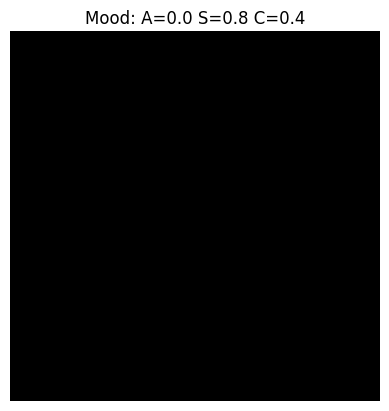

Gen 10 | Mood: [A:0.87 S:0.16 C:0.07] | Error: 0.01299
Gen 20 | Mood: [A:0.20 S:0.50 C:0.64] | Error: 0.04758
Gen 30 | Mood: [A:0.44 S:0.62 C:0.06] | Error: 0.04804
Gen 40 | Mood: [A:0.65 S:0.59 C:0.91] | Error: 0.04947
Gen 50 | Mood: [A:0.18 S:0.64 C:0.08] | Error: 0.04784


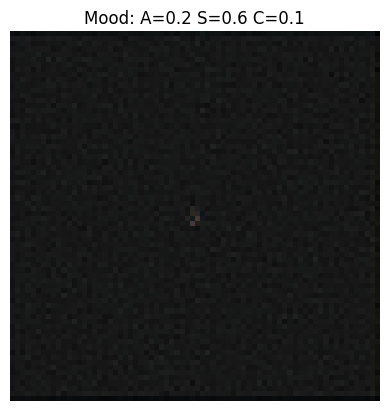

Gen 60 | Mood: [A:0.34 S:0.59 C:0.17] | Error: 0.04697
Gen 70 | Mood: [A:0.75 S:0.72 C:0.60] | Error: 0.05019
Gen 80 | Mood: [A:0.59 S:0.06 C:0.02] | Error: 0.00949
Gen 90 | Mood: [A:0.99 S:0.70 C:0.63] | Error: 0.04803
Gen 100 | Mood: [A:0.45 S:0.11 C:0.73] | Error: 0.00957


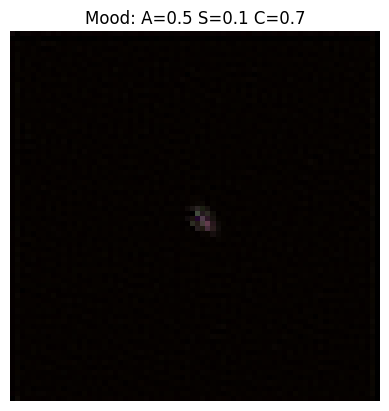

Gen 110 | Mood: [A:0.80 S:0.51 C:0.99] | Error: 0.04782
Gen 120 | Mood: [A:0.68 S:0.27 C:0.68] | Error: 0.00962
Gen 130 | Mood: [A:0.89 S:0.89 C:0.95] | Error: 0.04680
Gen 140 | Mood: [A:0.06 S:0.27 C:0.02] | Error: 0.00935
Gen 150 | Mood: [A:0.70 S:0.42 C:0.06] | Error: 0.01216


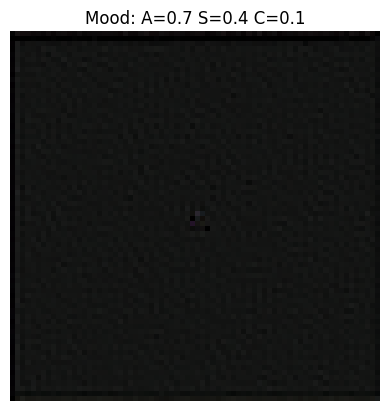

Gen 160 | Mood: [A:0.44 S:0.99 C:0.28] | Error: 0.04578
Gen 170 | Mood: [A:0.32 S:0.92 C:0.08] | Error: 0.04589
Gen 180 | Mood: [A:0.64 S:0.03 C:0.70] | Error: 0.00984
Gen 190 | Mood: [A:0.36 S:0.39 C:1.00] | Error: 0.01331
Gen 200 | Mood: [A:0.41 S:0.64 C:0.96] | Error: 0.04635


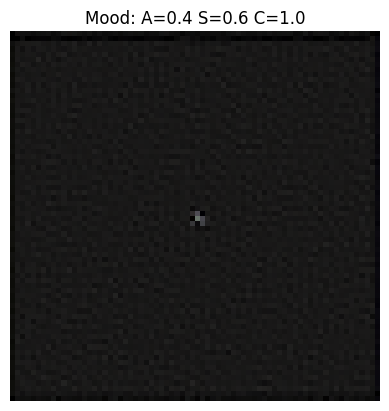

Gen 210 | Mood: [A:0.96 S:0.54 C:0.09] | Error: 0.04862
Gen 220 | Mood: [A:0.44 S:0.30 C:0.49] | Error: 0.00969
Gen 230 | Mood: [A:0.73 S:0.14 C:0.31] | Error: 0.00950
Gen 240 | Mood: [A:0.72 S:0.11 C:0.89] | Error: 0.01011
Gen 250 | Mood: [A:0.86 S:0.14 C:0.06] | Error: 0.00967


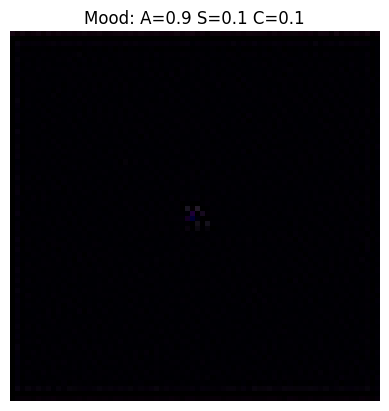

Gen 260 | Mood: [A:0.39 S:0.35 C:0.50] | Error: 0.01121
Gen 270 | Mood: [A:0.37 S:0.65 C:0.36] | Error: 0.04631
Gen 280 | Mood: [A:0.42 S:0.29 C:0.42] | Error: 0.00952
Gen 290 | Mood: [A:0.88 S:0.33 C:0.30] | Error: 0.00965
Gen 300 | Mood: [A:0.63 S:0.45 C:0.56] | Error: 0.01002


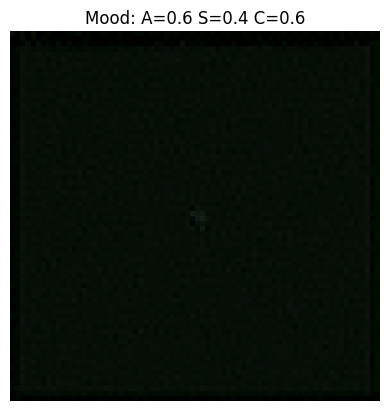

Gen 310 | Mood: [A:0.38 S:0.40 C:0.40] | Error: 0.01263
Gen 320 | Mood: [A:0.41 S:0.80 C:0.89] | Error: 0.04434
Gen 330 | Mood: [A:0.24 S:0.07 C:0.35] | Error: 0.01049
Gen 340 | Mood: [A:0.91 S:0.15 C:0.53] | Error: 0.00986
Gen 350 | Mood: [A:0.62 S:0.84 C:0.83] | Error: 0.04500


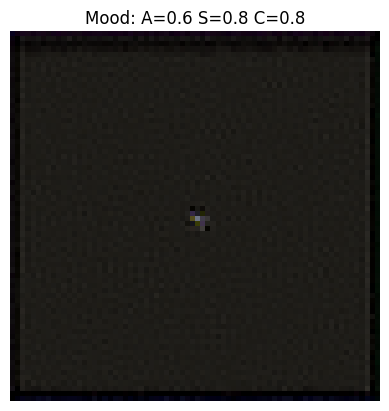

Gen 360 | Mood: [A:0.99 S:0.67 C:0.40] | Error: 0.04431
Gen 370 | Mood: [A:0.20 S:0.80 C:0.90] | Error: 0.04344
Gen 380 | Mood: [A:0.71 S:0.07 C:0.19] | Error: 0.00969
Gen 390 | Mood: [A:0.43 S:0.09 C:0.16] | Error: 0.00956
Gen 400 | Mood: [A:0.49 S:0.20 C:0.57] | Error: 0.00951


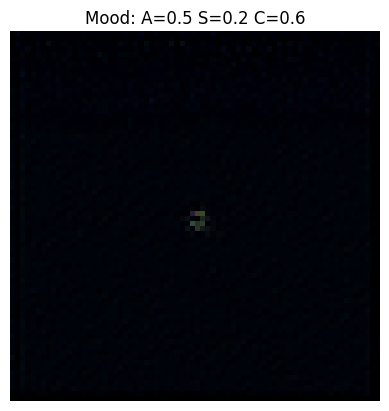

Gen 410 | Mood: [A:0.43 S:0.20 C:0.48] | Error: 0.00996
Gen 420 | Mood: [A:0.69 S:0.18 C:0.34] | Error: 0.00958
Gen 430 | Mood: [A:0.57 S:0.76 C:0.21] | Error: 0.04432
Gen 440 | Mood: [A:0.70 S:0.78 C:0.97] | Error: 0.04443
Gen 450 | Mood: [A:0.39 S:0.59 C:0.40] | Error: 0.04359


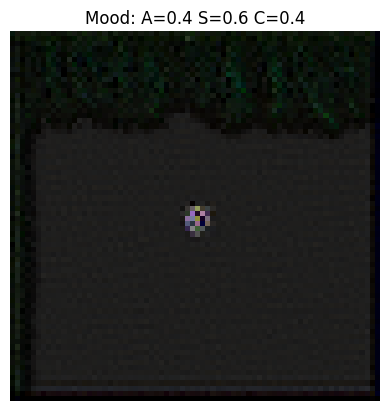

Gen 460 | Mood: [A:0.19 S:0.61 C:0.85] | Error: 0.04340
Gen 470 | Mood: [A:0.98 S:0.57 C:0.11] | Error: 0.04785
Gen 480 | Mood: [A:0.96 S:0.90 C:0.51] | Error: 0.04185
Gen 490 | Mood: [A:0.35 S:0.12 C:0.20] | Error: 0.00931
Gen 500 | Mood: [A:0.33 S:0.57 C:0.52] | Error: 0.04550


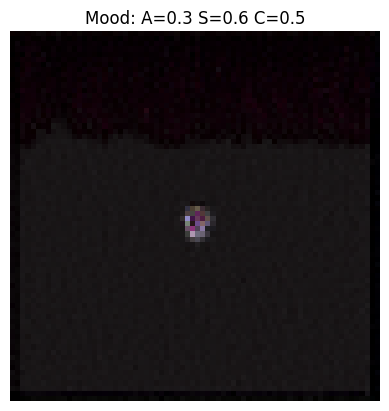

Gen 510 | Mood: [A:0.67 S:0.68 C:0.50] | Error: 0.04376
Gen 520 | Mood: [A:0.56 S:0.90 C:0.08] | Error: 0.04433
Gen 530 | Mood: [A:0.57 S:0.81 C:1.00] | Error: 0.03889
Gen 540 | Mood: [A:0.68 S:0.39 C:0.06] | Error: 0.01077
Gen 550 | Mood: [A:0.24 S:0.67 C:0.08] | Error: 0.04660


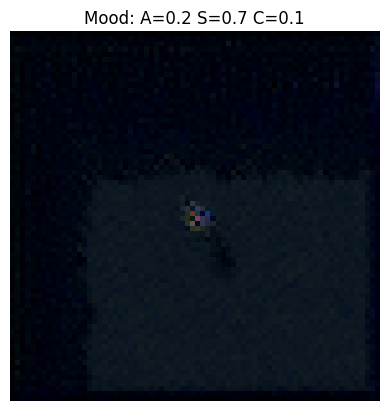

Gen 560 | Mood: [A:0.65 S:0.37 C:0.70] | Error: 0.01053
Gen 570 | Mood: [A:0.68 S:0.90 C:0.65] | Error: 0.04141
Gen 580 | Mood: [A:0.39 S:0.16 C:0.86] | Error: 0.00987
Gen 590 | Mood: [A:0.37 S:0.83 C:0.07] | Error: 0.04167
Gen 600 | Mood: [A:0.95 S:0.26 C:0.28] | Error: 0.01017


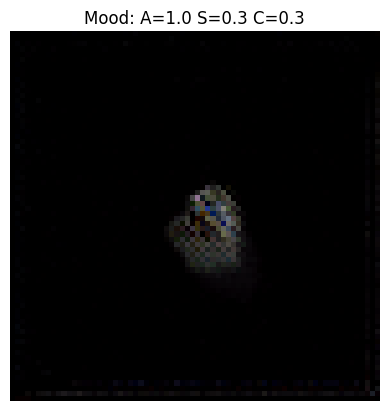

Gen 610 | Mood: [A:0.32 S:0.64 C:0.92] | Error: 0.03851
Gen 620 | Mood: [A:0.06 S:0.94 C:0.83] | Error: 0.04604
Gen 630 | Mood: [A:0.55 S:0.66 C:0.29] | Error: 0.04207
Gen 640 | Mood: [A:0.69 S:0.47 C:0.66] | Error: 0.01298
Gen 650 | Mood: [A:0.83 S:0.92 C:0.45] | Error: 0.03742


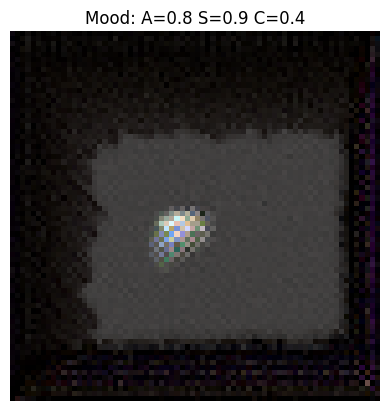

Gen 660 | Mood: [A:0.99 S:0.46 C:0.18] | Error: 0.01019
Gen 670 | Mood: [A:0.25 S:0.70 C:0.99] | Error: 0.03901
Gen 680 | Mood: [A:0.99 S:0.03 C:0.72] | Error: 0.01160
Gen 690 | Mood: [A:0.91 S:0.23 C:0.76] | Error: 0.00975
Gen 700 | Mood: [A:0.44 S:0.05 C:0.89] | Error: 0.01030


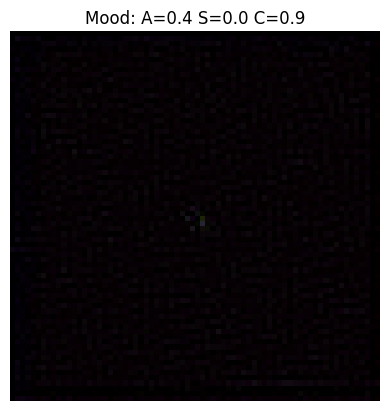

Gen 710 | Mood: [A:0.03 S:0.70 C:0.90] | Error: 0.03918
Gen 720 | Mood: [A:0.90 S:0.50 C:0.02] | Error: 0.04124
Gen 730 | Mood: [A:0.28 S:0.94 C:0.71] | Error: 0.03374
Gen 740 | Mood: [A:0.37 S:0.95 C:0.50] | Error: 0.04098
Gen 750 | Mood: [A:0.85 S:0.52 C:0.36] | Error: 0.03583


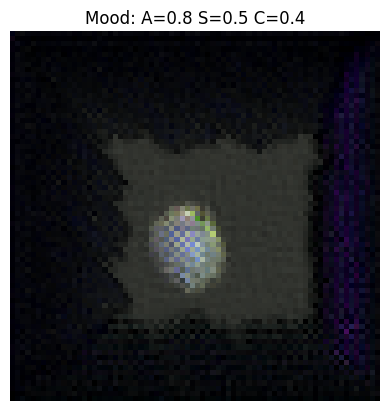

Gen 760 | Mood: [A:0.64 S:0.78 C:0.47] | Error: 0.04114
Gen 770 | Mood: [A:0.14 S:0.80 C:0.73] | Error: 0.03163
Gen 780 | Mood: [A:0.39 S:0.83 C:0.85] | Error: 0.03366
Gen 790 | Mood: [A:0.20 S:0.66 C:0.19] | Error: 0.04030
Gen 800 | Mood: [A:0.24 S:0.90 C:0.39] | Error: 0.04156


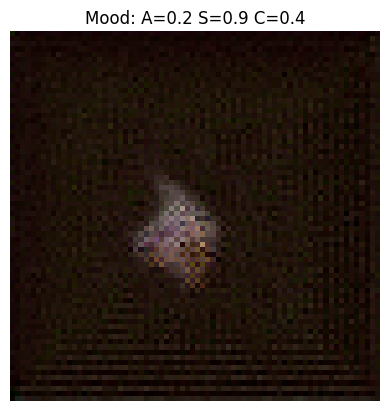

Gen 810 | Mood: [A:0.72 S:0.88 C:0.32] | Error: 0.04122
Gen 820 | Mood: [A:0.06 S:0.48 C:0.23] | Error: 0.02147
Gen 830 | Mood: [A:0.44 S:0.32 C:0.57] | Error: 0.00943
Gen 840 | Mood: [A:0.02 S:0.91 C:0.26] | Error: 0.03264
Gen 850 | Mood: [A:0.87 S:0.10 C:0.76] | Error: 0.01015


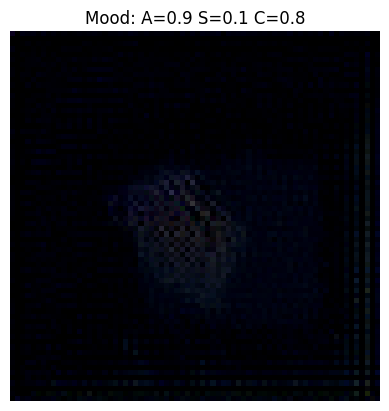

Gen 860 | Mood: [A:0.20 S:0.31 C:0.38] | Error: 0.00984
Gen 870 | Mood: [A:0.72 S:0.70 C:0.38] | Error: 0.03316
Gen 880 | Mood: [A:0.45 S:0.12 C:0.31] | Error: 0.00891
Gen 890 | Mood: [A:0.65 S:0.08 C:0.40] | Error: 0.00894
Gen 900 | Mood: [A:0.31 S:0.09 C:0.57] | Error: 0.00866


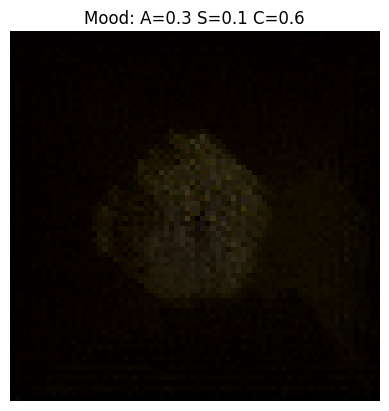

Gen 910 | Mood: [A:0.31 S:0.84 C:0.24] | Error: 0.03447
Gen 920 | Mood: [A:0.79 S:0.60 C:0.48] | Error: 0.03445
Gen 930 | Mood: [A:0.37 S:0.72 C:0.61] | Error: 0.03035
Gen 940 | Mood: [A:0.01 S:0.60 C:0.46] | Error: 0.03577
Gen 950 | Mood: [A:0.20 S:0.19 C:0.93] | Error: 0.00835


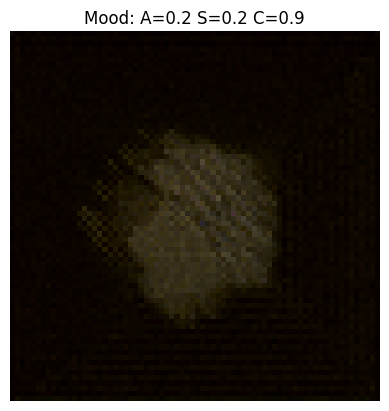

Gen 960 | Mood: [A:0.02 S:0.36 C:0.37] | Error: 0.00925
Gen 970 | Mood: [A:0.00 S:0.33 C:0.31] | Error: 0.01079
Gen 980 | Mood: [A:0.89 S:0.47 C:0.53] | Error: 0.01832
Gen 990 | Mood: [A:0.66 S:0.12 C:0.24] | Error: 0.00955
✅ Saved.


In [ ]:
# CELL: THE UNIVERSAL NANOSCALE AGI (100+ Modes via Continuous Embedding)
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
import random
import shutil
import gc
import matplotlib.pyplot as plt
from datetime import datetime

# --- 1. THE PHYSICS OF THE UNIVERSE (Setup) ---
SEED = 42
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CHANNELS = 16          # 16-Dimensional DNA
GRID_SIZE = 72         # The World Size
POOL_SIZE = 1024       # The Soup Size
BATCH_SIZE = 4         # Safe Memory Limit
CRYO_PATH = "nanoscale_agi_ultimate"
os.makedirs(CRYO_PATH, exist_ok=True)

print(f"🌌 Universe Created. Hardware: {device}")

# --- 2. THE DNA (The Brain) ---
class NeuroGenome(nn.Module):
    def __init__(self, channels=16):
        super().__init__()
        # Perception (Eyes): Sees neighbors
        self.w1 = nn.Conv2d(channels, 128, 3, padding=1)
        # Cognition (Brain): Processes "Emotions" (Channels 13,14,15 are critical here)
        self.w2 = nn.Conv2d(128, channels, 1)

        # Zero-init for stability (Start from void)
        nn.init.zeros_(self.w2.weight)
        nn.init.zeros_(self.w2.bias)

    def forward(self, x):
        dx = self.w1(x)
        dx = torch.relu(dx)
        dx = self.w2(dx)

        # Stochastic Life (The "Soul")
        b, c, h, w = x.shape
        mask = (torch.rand(b, 1, h, w, device=x.device) > 0.5).float()
        return x + dx * mask

# --- 3. THE ENVIRONMENT (Physics & Emotions) ---
def make_seed(batch_size):
    seed = torch.zeros(batch_size, CHANNELS, GRID_SIZE, GRID_SIZE, device=device)
    mid = GRID_SIZE // 2
    seed[:, 3:, mid, mid] = 1.0
    return seed

def inject_emotions(x, adrenaline, serotonin, cortisol):
    """
    Injects a 3-value 'Emotional Vector' into the last 3 channels.
    This creates a continuous space of 100+ possible behaviors.
    """
    b, c, h, w = x.shape
    # Create the hormone layers
    l_adr = torch.full((b, 1, h, w), float(adrenaline), device=device)
    l_ser = torch.full((b, 1, h, w), float(serotonin), device=device)
    l_cor = torch.full((b, 1, h, w), float(cortisol), device=device)

    # SAFE Reconstruction (No In-Place Error)
    # Body (0-12) + Emotions (13-15)
    body = x[:, :13, :, :]
    return torch.cat([body, l_adr, l_ser, l_cor], dim=1)

def get_complex_target(mode_vector, step):
    """
    Generates a target based on the 'Emotion'.
    - High Adrenaline: Target moves fast.
    - High Serotonin: Target is a stable, complex shape.
    - High Cortisol: Target shrinks/hides.
    """
    adr, ser, cor = mode_vector

    # 1. Base Shape (Serotonin controls complexity)
    Y, X = torch.meshgrid(torch.arange(GRID_SIZE, device=device), torch.arange(GRID_SIZE, device=device), indexing='ij')

    # 2. Movement Physics (Adrenaline controls speed/orbit)
    angle = step * (0.05 + (adr * 0.2)) # Faster if angry
    radius = 15.0 * (1.0 - (cor * 0.5)) # Shrinks if scared

    center_x = (GRID_SIZE//2) + radius * np.cos(angle)
    center_y = (GRID_SIZE//2) + radius * np.sin(angle)

    dist = torch.sqrt((X - center_x)**2 + (Y - center_y)**2)

    # 3. Shape Definition
    # If Zen (High Serotonin), shape is a Ring. If Panic (High Cortisol), shape is a Dot.
    size = 10.0 if ser > 0.5 else 4.0
    target_pattern = torch.exp(-(dist**2) / (2 * size**2))

    # Expand to batch
    return target_pattern.unsqueeze(0).unsqueeze(0).repeat(BATCH_SIZE, 4, 1, 1)

# --- 4. THE SIMULATION LOOP (100+ Modes) ---
model = NeuroGenome(CHANNELS).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)

# Try Resurrect
try:
    checkpoint = torch.load(f"{CRYO_PATH}/ultimate_agi.pth", map_location=device)
    model.load_state_dict(checkpoint['dna'])
    optimizer.load_state_dict(checkpoint['opt'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"🔥 Resurrecting Ultimate AGI at Epoch {start_epoch}")
except:
    start_epoch = 0
    print("🌱 Genesis: A New Life Begins.")

print("\n🧠 STARTING 'EMOTIONAL SPECTRUM' TRAINING...")
print("   (Adrenaline, Serotonin, Cortisol) mixing active.")

try:
    for epoch in range(start_epoch, start_epoch + 1000):
        optimizer.zero_grad()

        # --- EMOTION GENERATOR ---
        # Instead of fixed modes, we sample random floats.
        # This creates INFINITE modes.
        # Example: [0.9, 0.1, 0.1] = Aggressive Hunt
        # Example: [0.1, 0.9, 0.1] = Peaceful Regeneration
        adr = random.random() # Adrenaline (Speed)
        ser = random.random() # Serotonin (Stability)
        cor = random.random() # Cortisol (Fear/Shrinking)

        x = make_seed(BATCH_SIZE)

        loss_accum = 0.0

        for step in range(64):
            # A. Inject the Current Mood
            x = inject_emotions(x, adr, ser, cor)

            # B. Life Update
            x = model(x)

            # C. Evaluation (Sampled)
            if step > 20 and step % 10 == 0:
                # Target changes based on the emotion!
                target = get_complex_target((adr, ser, cor), step)

                # Damage Logic (Only if Low Serotonin - vulnerable)
                if step == 32 and ser < 0.3:
                    mask = (torch.rand_like(x[:,:1,:,:]) > 0.3).float()
                    x = x * mask

                loss_step = F.mse_loss(x[:, :4, :, :], target)
                loss_accum += loss_step

        final_loss = loss_accum / 4.0
        final_loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        # --- REPORTING ---
        if epoch % 10 == 0:
            print(f"Gen {epoch} | Mood: [A:{adr:.2f} S:{ser:.2f} C:{cor:.2f}] | Error: {final_loss.item():.5f}")

            # Save
            if epoch % 50 == 0:
                torch.save({
                    'dna': model.state_dict(),
                    'opt': optimizer.state_dict(),
                    'epoch': epoch
                }, f"{CRYO_PATH}/ultimate_agi.pth")

                # Simple Visualization of the Current Mood's Output
                with torch.no_grad():
                    img = x[0, :3, :, :].permute(1, 2, 0).cpu().clamp(0,1).numpy()
                    plt.imshow(img)
                    plt.title(f"Mood: A={adr:.1f} S={ser:.1f} C={cor:.1f}")
                    plt.axis('off')
                    plt.show()
                    plt.close()

except KeyboardInterrupt:
    print("\n🛑 PAUSED.")
finally:
    torch.save({'dna': model.state_dict(), 'opt': optimizer.state_dict(), 'epoch': epoch}, f"{CRYO_PATH}/ultimate_agi.pth")
    print("✅ Saved.")